In [ ]:
# prompt: print in csv  table

import csv

conn = sqlite3.connect('upwork1.db')
cursor = conn.cursor()

cursor.execute("SELECT * FROM jobs")
jobs = cursor.fetchall()

with open('jobs.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow([i[0] for i in cursor.description]) # write header
    writer.writerows(jobs)

conn.close()


In [ ]:
def categorize_job(row):
    title = row['title'].lower()
    keywords = row['keywords'].lower() if 'keywords' in row else ''

    # Expanded keywords for each category
    if any(keyword in title or keyword in keywords for keyword in ['data', 'analytics', 'scientist', 'analyst','chatbot', 'machine learning', 'deep learning', 'AI', 'artificial intelligence', 'data mining', 'business intelligence', 'big data', 'genai', 'generative ai', 'nlp', 'natural language processing', 'machine learning operations', 'mlops', 'data engineering','GPT','openAi','huggingface','power BI','LLM','NLP','Web Scraping','python']):
        return 'Data Science & Analytics'
    elif any(keyword in title or keyword in keywords for keyword in ['web', 'developer', 'programming', 'software', 'web developer', 'front-end', 'back-end', 'full-stack', 'java', 'javascript', 'php', 'react', 'angular', 'node.js', 'django', 'laravel', 'ruby on rails', 'wordpress', 'wordpress developer', 'woocommerce', 'web design', 'web developer', 'web designer']):
        return 'Web Development'
    elif any(keyword in title or keyword in keywords for keyword in ['mobile', 'app', 'android', 'ios', 'mobile developer', 'kotlin', 'swift', 'flutter', 'react native', 'mobile app development', 'mobile app developer']):
        return 'Mobile Development'
    elif any(keyword in title or keyword in keywords for keyword in ['project', 'manager', 'lead', 'project management', 'agile', 'scrum', 'kanban', 'waterfall', 'project coordinator']):
        return 'Project Management'
    elif any(keyword in title or keyword in keywords for keyword in ['administrative', 'support', 'assistant', 'receptionist', 'clerical', 'virtual assistant', 'va', 'office management', 'data entry', 'customer service representative', 'csr']):
        return 'Administrative Support'
    elif any(keyword in title or keyword in keywords for keyword in ['sales', 'business development', 'sales representative', 'account manager', 'account executive', 'lead generation', 'cold calling', 'telemarketing', 'outbound sales', 'marketing', 'marketing consultant']):
        return 'Sales & Marketing'
    elif any(keyword in title or keyword in keywords for keyword in ['seo', 'search engine optimization', 'keyword research', 'on-page seo', 'off-page seo', 'technical seo', 'content marketing', 'sem', 'ppc', 'paid advertising', 'digital marketing', 'social media marketing']):
        return 'Search Engine Optimization (SEO) & Digital Marketing'
    elif any(keyword in title or keyword in keywords for keyword in ['social media', 'management', 'social media manager', 'community manager', 'content creator', 'influencer marketing', 'instagram', 'facebook', 'tiktok', 'twitter', 'linkedin', 'youtube']):
        return 'Social Media Management'
    elif any(keyword in title or keyword in keywords for keyword in ['graphic design', 'visual design', 'photoshop', 'illustrator', 'adobe creative suite', 'canva', 'design', 'designer', 'branding', 'logo design', 'ux/ui design', 'web design', 'layout design', 'print design', 'illustration', 'animation']):
        return 'Design & Creative'
    elif any(keyword in title or keyword in keywords for keyword in ['ux', 'ui', 'user experience', 'user interface', 'ux designer', 'ui designer', 'wireframing', 'prototyping', 'interaction design']):
        return 'UX/UI Design'
    elif any(keyword in title or keyword in keywords for keyword in ['video', 'production', 'video editor', 'filmmaking', 'after effects', 'premiere pro', 'final cut pro', 'motion graphics', 'animation', 'videographer', 'editor', 'content creator']):
        return 'Video Production'
    elif any(keyword in title or keyword in keywords for keyword in ['writing', 'content', 'editor', 'copy editor', 'proofreader', 'copywriting', 'content writer', 'technical writing', 'scriptwriting', 'ghostwriting', 'article writing', 'blog writing', 'copywriter', 'technical writer', 'editor', 'proofreader']):
        return 'Writing & Editing'
    elif any(keyword in title or keyword in keywords for keyword in ['translation', 'translator', 'interpreter', 'language', 'localization', 'localization specialist']):
        return 'Translation & Localization'
    elif any(keyword in title or keyword in keywords for keyword in ['it support', 'technical support', 'help desk', 'system administrator', 'network administrator', 'it technician', 'computer science', 'cloud computing', 'aws', 'azure', 'gcp', 'devops', 'kubernetes', 'docker', 'virtualization', 'cybersecurity', 'security', 'penetration testing', 'ethical hacking', 'information security', 'data security', 'network security']):
        return 'IT & Technology'
    elif any(keyword in title or keyword in keywords for keyword in ['network', 'engineering', 'network engineer', 'cisco', 'juniper', 'network administrator', 'it security', 'network security']):
        return 'Network Engineering & Security'
    elif any(keyword in title or keyword in keywords for keyword in ['financial', 'consulting', 'financial analyst', 'investment banking', 'financial advisor', 'cfo', 'accounting', 'bookkeeping', 'accountant', 'tax preparation', 'tax consultant', 'tax filing', 'auditing', 'financial modeling', 'financial reporting']):
        return 'Finance & Accounting'
    elif any(keyword in title or keyword in keywords for keyword in ['business consulting', 'management consultant', 'strategy consultant', 'business advisor', 'consultant', 'business development', 'project management', 'process improvement', 'operations management', 'business analysis']):
        return 'Business Consulting'
    elif any(keyword in title or keyword in keywords for keyword in ['legal', 'law', 'lawyer', 'paralegal', 'contract', 'contract law', 'intellectual property', 'ip', 'trademark', 'patent', 'litigation', 'compliance', 'regulatory', 'compliance consultant', 'legal advisor', 'legal research', 'contract drafting', 'legal writing', 'paralegal', 'lawyer', 'attorney', 'legal consultant', 'legal advisor', 'legal researcher', 'legal writer', 'legal assistant', 'contract specialist', 'intellectual property lawyer', 'patent attorney', 'litigation attorney', 'corporate lawyer', 'tax lawyer']):
        return 'Legal'
    elif any(keyword in title or keyword in keywords for keyword in ['human resources', 'hr', 'recruitment', 'recruiter', 'talent acquisition', 'onboarding', 'payroll', 'employee relations', 'compensation', 'benefits', 'hr consultant', 'payroll specialist', 'hr manager', 'recruitment manager', 'talent acquisition manager', 'hr generalist', 'hr specialist', 'payroll manager', 'compensation and benefits specialist', 'employee relations specialist', 'hr technology', 'hr analytics']):
        return 'Human Resources'
    elif any(keyword in title or keyword in keywords for keyword in ['blockchain', 'crypto', 'cryptocurrency', 'crypto exchange', 'defi', 'nft', 'web3', 'smart contract', 'blockchain development', 'cryptocurrency exchange', 'crypto trading', 'crypto wallet', 'blockchain engineer', 'crypto engineer', 'blockchain developer', 'cryptocurrency developer', 'blockchain consultant', 'crypto consultant', 'decentralized finance', 'web3 development', 'cryptocurrency trading', 'nft art', 'blockchain security', 'crypto security']):
        return 'Blockchain'
    elif any(keyword in title or keyword in keywords for keyword in ['sports', 'athlete', 'fitness', 'training', 'coach', 'nutrition', 'wellness', 'personal trainer', 'sports marketing', 'sports management', 'sports agency', 'sports medicine', 'athlete', 'coach', 'trainer', 'fitness', 'wellness', 'nutritionist', 'dietitian', 'sports performance', 'athletic training', 'sports science', 'sports marketing', 'sports management', 'sports agency', 'sports events']):
        return 'Sports & Fitness'
    elif any(keyword in title or keyword in keywords for keyword in ['fashion', 'clothing', 'apparel', 'retail', 'wholesale', 'merchandising', 'style', 'fashion designer', 'fashion stylist', 'fashion marketing', 'textile', 'embroidery', 'sewing', 'tailoring', 'product design', 'fashion photography', 'fashion blogger', 'fashion influencer', 'fashion stylist', 'fashion buyer', 'fashion retailer']):
        return 'Fashion & Apparel'
    elif any(keyword in title or keyword in keywords for keyword in ['food', 'restaurant', 'catering', 'chef', 'cook', 'bakery', 'food delivery', 'food service', 'food industry', 'culinary', 'recipe', 'food photography', 'product packaging', 'food blogger', 'food influencer', 'food stylist', 'food writer', 'restaurant management', 'food service management']):
        return 'Food & Beverage'
    elif any(keyword in title or keyword in keywords for keyword in ['art', 'artist', 'designer', 'illustrator', 'graphic designer', 'photographer', 'animation', 'vfx', '3d modeling', '3d animation', 'digital art', 'fine art', 'art director', 'art history', 'art critique', 'art conservation', 'art restoration', 'art gallery', 'art museum', 'art collector', 'art dealer', 'artist', 'illustrator', 'designer', 'animator', 'graphic designer', 'art director', 'art curator', 'art critic', 'art teacher', 'artist', 'designer', 'illustrator', 'animator', 'graphic designer', 'art director', 'art curator', 'art critic', 'art teacher', 'fine art', 'digital art', 'photography', 'video', 'film', 'animation', '3d modeling', '3d animation', 'graphic design', 'web design', 'ux/ui design', 'art history', 'art theory', 'art criticism', 'art marketing', 'art education', 'art conservation', 'art restoration', 'art collection', 'art exhibition', 'art gallery', 'art museum', 'art fair', 'art auction', 'art therapy']):
        return 'Art & Design'
    elif any(keyword in title or keyword in keywords for keyword in ['music', 'musician', 'composer', 'songwriter', 'producer', 'audio engineer', 'sound mixer', 'audio editing', 'music production', 'recording artist', 'audiobook narrator', 'voice over', 'voice actor', 'musician', 'instrumentalist', 'singer', 'music teacher', 'music therapy', 'music theory', 'music technology', 'sound design', 'music licensing', 'music publishing', 'music marketing', 'music producer', 'music composer', 'music editor', 'music mixer', 'music arranger', 'sound engineer', 'music industry', 'musician', 'singer', 'songwriter', 'composer', 'producer', 'DJ', 'audio engineer', 'music therapist', 'music teacher', 'music journalist', 'music production', 'music composition', 'music arrangement', 'music engineering', 'music mixing', 'music mastering', 'music scoring', 'music licensing', 'music publishing', 'music performance', 'music education', 'music therapy', 'music theory', 'music history']):
        return 'Music'
    elif any(keyword in title or keyword in keywords for keyword in ['law', 'lawyer', 'legal', 'attorney', 'contract law', 'intellectual property', 'ip', 'trademark', 'patent', 'litigation', 'compliance', 'regulatory', 'compliance consultant', 'legal advisor', 'legal research', 'contract drafting', 'legal writing', 'paralegal', 'lawyer', 'attorney', 'legal consultant', 'legal advisor', 'legal researcher', 'legal writer', 'legal assistant', 'contract specialist', 'intellectual property lawyer', 'patent attorney', 'litigation attorney', 'corporate lawyer', 'tax lawyer']):
        return 'Legal'
    elif any(keyword in title or keyword in keywords for keyword in ['human resources', 'hr', 'recruitment', 'recruiter', 'talent acquisition', 'onboarding', 'payroll', 'employee relations', 'compensation', 'benefits', 'hr consultant', 'payroll specialist', 'hr manager', 'recruitment manager', 'talent acquisition manager', 'hr generalist', 'hr specialist', 'payroll manager', 'compensation and benefits specialist', 'employee relations specialist', 'hr technology', 'hr analytics']):
        return 'Human Resources'
    elif any(keyword in title or keyword in keywords for keyword in ['blockchain', 'crypto', 'cryptocurrency', 'crypto exchange', 'defi', 'nft', 'web3', 'smart contract', 'blockchain development', 'cryptocurrency exchange', 'crypto trading', 'crypto wallet', 'blockchain engineer', 'crypto engineer', 'blockchain developer', 'cryptocurrency developer', 'blockchain consultant', 'crypto consultant', 'decentralized finance', 'web3 development', 'cryptocurrency trading', 'nft art', 'blockchain security', 'crypto security', 'blockchain', 'cryptocurrency', 'crypto', 'web3', 'defi', 'nft', 'smart contracts', 'blockchain technology', 'crypto trading', 'crypto wallet', 'crypto mining', 'blockchain development', 'cryptocurrency development', 'blockchain security', 'crypto security', 'web3 development', 'decentralized finance', 'decentralized applications', 'dapps', 'non-fungible tokens', 'tokenomics', 'crypto exchanges', 'cryptocurrency exchanges', 'crypto trading', 'cryptocurrency trading', 'blockchain consulting', 'cryptocurrency consulting', 'blockchain security', 'crypto security', 'blockchain engineer', 'crypto engineer', 'blockchain developer', 'cryptocurrency developer', 'web3 developer', 'defi developer', 'nft developer']):
        return 'Blockchain'
    elif any(keyword in title or keyword in keywords for keyword in ['construction', 'architecture', 'engineer', 'civil engineer', 'structural engineer', 'mechanical engineer', 'architect', 'drafting', 'cad', 'autocad', 'revit', 'sketchUp', '3d modeling', '3d rendering', 'building information modeling', 'bim', 'project management', 'construction management', 'renovation', 'remodel', 'home improvement', 'landscape design', 'landscaping', 'building', 'engineering', 'construction technology', 'building design', 'construction design', 'architecture design', 'interior design', 'landscape architecture', 'structural analysis', 'construction estimating', 'construction bidding', 'construction project management', 'construction', 'architecture', 'engineering', 'civil engineering', 'structural engineering', 'mechanical engineering', 'architectural design', 'interior design', 'landscape design', 'construction management', 'project management', 'construction technology', 'building information modeling', 'bim', 'cad', 'autocad', 'revit', 'sketchUp', '3d modeling', '3d rendering', 'construction estimating', 'construction bidding', 'construction materials', 'construction equipment', 'construction safety', 'construction law', 'construction economics', 'construction project management', 'construction engineer', 'architectural engineer', 'civil engineer', 'structural engineer', 'mechanical engineer', 'interior designer', 'landscape architect', 'construction manager', 'project manager', 'construction estimator', 'construction superintendent']):
        return 'Construction'
    elif any(keyword in title or keyword in keywords for keyword in ['finance', 'accounting', 'bookkeeping', 'financial analyst', 'financial advisor', 'tax', 'tax preparation', 'cpa', 'auditor', 'financial modeling', 'investment', 'investor', 'venture capital', 'private equity', 'wealth management', 'financial planning', 'financial consultant', 'accountant', 'bookkeeper', 'tax accountant', 'tax preparer', 'financial advisor', 'financial planner', 'investment banker', 'investment advisor', 'financial manager', 'financial analyst', 'financial reporting', 'financial modeling', 'accounting software', 'bookkeeping software', 'tax software', 'financial analysis tools', 'financial modeling tools', 'investment banking', 'investment management', 'wealth management']):
        return 'Finance'
    elif any(keyword in title or keyword in keywords for keyword in ['travel', 'tourism', 'travel agent', 'tour operator', 'hospitality', 'hotel', 'restaurant', 'event planning', 'concierge', 'travel consultant', 'adventure travel', 'luxury travel', 'cruise', 'airline', 'tourism marketing', 'hospitality management', 'event management', 'tourism', 'travel', 'travel agent', 'tour operator', 'travel agency', 'travel consultant', 'travel planner', 'travel blogger', 'travel influencer', 'hotel management', 'hospitality industry', 'tourism industry', 'event management', 'travel technology', 'travel marketing', 'travel booking', 'travel insurance', 'tourism', 'travel', 'travel agency', 'travel agent', 'tour operator', 'travel blogger', 'travel influencer', 'travel writer', 'travel photographer', 'travel consultant', 'travel planner', 'travel advisor', 'travel marketing', 'travel management', 'travel technology', 'hospitality', 'hotel', 'restaurant', 'event planning', 'concierge', 'hospitality management', 'hotel management', 'restaurant management', 'event planning', 'event management', 'hospitality industry', 'tourism industry']):
        return 'Travel'
    elif any(keyword in title or keyword in keywords for keyword in ['logistics', 'supply chain', 'supply chain management', 'logistics management', 'procurement', 'purchasing', 'shipping', 'warehousing', 'distribution', 'inventory management', 'transportation', 'freight', 'supply chain consultant', 'logistics consultant', 'procurement specialist', 'purchasing manager', 'logistics manager', 'supply chain analyst', 'supply chain engineer', 'logistics engineer', 'freight forwarder', '3pl', '4pl', 'logistics', 'supply chain', 'supply chain management', 'logistics management', 'procurement', 'purchasing', 'shipping', 'warehousing', 'distribution', 'inventory management', 'transportation', 'freight', 'supply chain consultant', 'logistics consultant', 'procurement specialist', 'purchasing manager', 'logistics manager', 'supply chain analyst', 'supply chain engineer', 'logistics engineer', 'freight forwarder', '3pl', '4pl']):
        return 'Logistics'
    elif any(keyword in title or keyword in keywords for keyword in ['customer service', 'support', 'customer support representative', 'call center', 'help desk', 'client services', 'account management', 'client management', 'customer success', 'customer experience', 'user experience', 'ux', 'customer service', 'customer support', 'customer experience', 'client services', 'account management', 'customer success manager', 'customer service representative', 'call center agent', 'help desk agent', 'technical support', 'customer support specialist']):
        return 'Customer Service'
    elif any(keyword in title or keyword in keywords for keyword in ['healthcare', 'medical', 'hospital', 'clinic', 'doctor', 'nurse', 'physician', 'therapist', 'pharmacist', 'dentist', 'mental health', 'psychology', 'psychiatry', 'biotechnology', 'bioinformatics', 'pharmaceutical', 'biomedical', 'healthcare consultant', 'healthcare marketing', 'healthcare technology', 'medical billing', 'medical coding', 'healthcare administration', 'health insurance', 'health and wellness', 'medical', 'healthcare', 'doctor', 'nurse', 'physician', 'physician assistant', 'nurse practitioner', 'pharmacist', 'dentist', 'therapist', 'psychologist', 'psychiatrist', 'medical coder', 'medical biller', 'healthcare administrator', 'healthcare manager', 'healthcare marketing', 'healthcare technology', 'medical research', 'clinical research', 'biotechnology', 'biomedical engineering', 'pharmaceutical industry', 'healthcare industry']):
        return 'Healthcare'
    elif any(keyword in title or keyword in keywords for keyword in ['education', 'teaching', 'tutor', 'instructor', 'professor', 'curriculum', 'learning management system', 'lms', 'e-learning', 'online learning', 'training', 'course development', 'educational content', 'educational technology', 'edtech', 'student', 'teacher', 'tutor', 'instructor', 'professor', 'school', 'college', 'university', 'education consultant', 'educational researcher', 'learning and development', 'teacher', 'instructor', 'professor', 'tutor', 'educational consultant', 'curriculum developer', 'learning and development specialist', 'instructional designer', 'online learning platform', 'educational technology specialist', 'e-learning platform', 'education researcher', 'education writer', 'education marketer', 'online learning', 'education', 'teaching', 'teacher', 'tutor', 'instructor', 'professor', 'curriculum', 'curriculum development', 'instructional design', 'learning management system', 'lms', 'e-learning', 'online course', 'course creator', 'educational technology', 'edtech', 'educational content', 'education consultant', 'educational researcher', 'education writer', 'education marketer', 'educational materials', 'educational resources', 'training', 'training development', 'training delivery', 'training evaluation']):
        return 'Education'
    elif any(keyword in title or keyword in keywords for keyword in ['marketing', 'digital marketing', 'social media marketing', 'content marketing', 'email marketing', 'seo', 'sem', 'ppc', 'paid advertising', 'marketing automation', 'crm', 'marketing strategy', 'marketing analyst', 'marketing consultant', 'marketing manager', 'brand manager', 'marketing agency', 'advertising', 'advertising agency', 'media buying', 'public relations', 'pr', 'content creation', 'influencer marketing', 'social media management', 'marketing specialist', 'marketing manager', 'digital marketing manager', 'marketing consultant', 'marketing agency', 'marketing research', 'marketing analytics', 'marketing automation', 'marketing strategy', 'marketing communications', 'brand management', 'digital advertising', 'social media marketing', 'content marketing', 'email marketing', 'seo', 'sem', 'ppc', 'paid advertising', 'affiliate marketing', 'influencer marketing', 'social media management', 'marketing automation', 'crm', 'marketing analytics', 'marketing strategy', 'marketing communications', 'brand management', 'digital advertising', 'social media marketing', 'content marketing', 'email marketing', 'seo', 'sem', 'ppc', 'paid advertising', 'affiliate marketing', 'influencer marketing', 'social media management', 'marketing automation', 'crm', 'marketing analytics', 'marketing strategy', 'marketing communications', 'brand management', 'digital advertising', 'social media marketing', 'content marketing', 'email marketing', 'seo', 'sem', 'ppc', 'paid advertising', 'affiliate marketing', 'influencer marketing', 'social media management', 'marketing automation', 'crm', 'marketing analytics', 'marketing strategy', 'marketing communications', 'brand management']):
        return 'Marketing'
    elif any(keyword in title or keyword in keywords for keyword in ['nonprofit', 'charity', 'ngo', 'fundraising', 'grant writing', 'philanthropy', 'social impact', 'non-profit organization', 'non-profit management', 'non-profit consultant', 'non-profit marketing', 'charity', 'foundation', 'non-governmental organization', 'non-profit', 'philanthropy', 'fundraising', 'grant writing', 'non-profit development', 'non-profit management', 'non-profit marketing', 'non-profit research', 'non-profit communications', 'non-profit technology']):
        return 'Nonprofit'
    elif any(keyword in title or keyword in keywords for keyword in ['law', 'lawyer', 'legal', 'attorney', 'contract law', 'intellectual property', 'ip', 'trademark', 'patent', 'litigation', 'compliance', 'regulatory', 'compliance consultant', 'legal advisor', 'legal research', 'contract drafting', 'legal writing', 'paralegal', 'lawyer', 'attorney', 'legal consultant', 'legal advisor', 'legal researcher', 'legal writer', 'legal assistant', 'contract specialist', 'intellectual property lawyer', 'patent attorney', 'litigation attorney', 'corporate lawyer', 'tax lawyer']):
        return 'Legal'
    elif any(keyword in title or keyword in keywords for keyword in ['human resources', 'hr', 'recruitment', 'recruiter', 'talent acquisition', 'onboarding', 'payroll', 'employee relations', 'compensation', 'benefits', 'hr consultant', 'payroll specialist', 'hr manager', 'recruitment manager', 'talent acquisition manager', 'hr generalist', 'hr specialist', 'payroll manager', 'compensation and benefits specialist', 'employee relations specialist', 'hr technology', 'hr analytics']):
        return 'Human Resources'
    elif any(keyword in title or keyword in keywords for keyword in ['blockchain', 'crypto', 'cryptocurrency', 'crypto exchange', 'defi', 'nft', 'web3', 'smart contract', 'blockchain development', 'cryptocurrency exchange', 'crypto trading', 'crypto wallet', 'blockchain engineer', 'crypto engineer', 'blockchain developer', 'cryptocurrency developer', 'blockchain consultant', 'crypto consultant', 'decentralized finance', 'web3 development', 'cryptocurrency trading', 'nft art', 'blockchain security', 'crypto security', 'blockchain', 'cryptocurrency', 'crypto', 'web3', 'defi', 'nft', 'smart contracts', 'blockchain technology', 'crypto trading', 'crypto wallet', 'crypto mining', 'blockchain development', 'cryptocurrency development', 'blockchain security', 'crypto security', 'web3 development', 'decentralized finance', 'decentralized applications', 'dapps', 'non-fungible tokens', 'tokenomics', 'crypto exchanges', 'cryptocurrency exchanges', 'crypto trading', 'cryptocurrency trading', 'blockchain consulting', 'cryptocurrency consulting', 'blockchain security', 'crypto security', 'blockchain engineer', 'crypto engineer', 'blockchain developer', 'cryptocurrency developer', 'web3 developer', 'defi developer', 'nft developer']):
        return 'Blockchain'
    elif any(keyword in title or keyword in keywords for keyword in ['construction', 'architecture', 'engineer', 'civil engineer', 'structural engineer', 'mechanical engineer', 'architect', 'drafting', 'cad', 'autocad', 'revit', 'sketchUp', '3d modeling', '3d rendering', 'building information modeling', 'bim', 'project management', 'construction management', 'renovation', 'remodel', 'home improvement', 'landscape design', 'landscaping', 'building', 'engineering', 'construction technology', 'building design', 'construction design', 'architecture design', 'interior design', 'landscape architecture', 'structural analysis', 'construction estimating', 'construction bidding', 'construction project management', 'construction', 'architecture', 'engineering', 'civil engineering', 'structural engineering', 'mechanical engineering', 'architectural design', 'interior design', 'landscape design', 'construction management', 'project management', 'construction technology', 'building information modeling', 'bim', 'cad', 'autocad', 'revit', 'sketchUp', '3d modeling', '3d rendering', 'construction estimating', 'construction bidding', 'construction materials', 'construction equipment', 'construction safety', 'construction law', 'construction economics', 'construction project management', 'construction engineer', 'architectural engineer', 'civil engineer', 'structural engineer', 'mechanical engineer', 'interior designer', 'landscape architect', 'construction manager', 'project manager', 'construction estimator', 'construction superintendent']):
        return 'Construction'
    elif any(keyword in title or keyword in keywords for keyword in ['finance', 'accounting', 'bookkeeping', 'financial analyst', 'financial advisor', 'tax', 'tax preparation', 'cpa', 'auditor', 'financial modeling', 'investment', 'investor', 'venture capital', 'private equity', 'wealth management', 'financial planning', 'financial consultant', 'accountant', 'bookkeeper', 'tax accountant', 'tax preparer', 'financial advisor', 'financial planner', 'investment banker', 'investment advisor', 'financial manager', 'financial analyst', 'financial reporting', 'financial modeling', 'accounting software', 'bookkeeping software', 'tax software', 'financial analysis tools', 'financial modeling tools', 'investment banking', 'investment management', 'wealth management']):
        return 'Finance'
    elif any(keyword in title or keyword in keywords for keyword in ['travel', 'tourism', 'travel agent', 'tour operator', 'hospitality', 'hotel', 'restaurant', 'event planning', 'concierge', 'travel consultant', 'adventure travel', 'luxury travel', 'cruise', 'airline', 'tourism marketing', 'hospitality management', 'event management', 'tourism', 'travel', 'travel agency', 'travel agent', 'tour operator', 'travel blogger', 'travel influencer', 'travel writer', 'travel photographer', 'travel consultant', 'travel planner', 'travel advisor', 'travel marketing', 'travel management', 'travel technology', 'hospitality', 'hotel', 'restaurant', 'event planning', 'concierge', 'hospitality management', 'hotel management', 'restaurant management', 'event planning', 'event management', 'hospitality industry', 'tourism industry']):
        return 'Travel'
    elif any(keyword in title or keyword in keywords for keyword in ['logistics', 'supply chain', 'supply chain management', 'logistics management', 'procurement', 'purchasing', 'shipping', 'warehousing', 'distribution', 'inventory management', 'transportation', 'freight', 'supply chain consultant', 'logistics consultant', 'procurement specialist', 'purchasing manager', 'logistics manager', 'supply chain analyst', 'supply chain engineer', 'logistics engineer', 'freight forwarder', '3pl', '4pl', 'logistics', 'supply chain', 'supply chain management', 'logistics management', 'procurement', 'purchasing', 'shipping', 'warehousing', 'distribution', 'inventory management', 'transportation', 'freight', 'supply chain consultant', 'logistics consultant', 'procurement specialist', 'purchasing manager', 'logistics manager', 'supply chain analyst', 'supply chain engineer', 'logistics engineer', 'freight forwarder', '3pl', '4pl']):
        return 'Logistics'
    elif any(keyword in title or keyword in keywords for keyword in ['customer service', 'support', 'customer support representative', 'call center', 'help desk', 'client services', 'account management', 'client management', 'customer success', 'customer experience', 'user experience', 'ux', 'customer service', 'customer support', 'customer experience', 'client services', 'account management', 'customer success manager', 'customer service representative', 'call center agent', 'help desk agent', 'technical support', 'customer support specialist']):
        return 'Customer Service'
    elif any(keyword in title or keyword in keywords for keyword in ['healthcare', 'medical', 'hospital', 'clinic', 'doctor', 'nurse', 'physician', 'therapist', 'pharmacist', 'dentist', 'mental health', 'psychology', 'psychiatry', 'biotechnology', 'bioinformatics', 'pharmaceutical', 'biomedical', 'healthcare consultant', 'healthcare marketing', 'healthcare technology', 'medical billing', 'medical coding', 'healthcare administration', 'health insurance', 'health and wellness', 'medical', 'healthcare', 'doctor', 'nurse', 'physician', 'physician assistant', 'nurse practitioner', 'pharmacist', 'dentist', 'therapist', 'psychologist', 'psychiatrist', 'medical coder', 'medical biller', 'healthcare administrator', 'healthcare manager', 'healthcare marketing', 'healthcare technology', 'medical research', 'clinical research', 'biotechnology', 'biomedical engineering', 'pharmaceutical industry', 'healthcare industry']):
        return 'Healthcare'
    elif any(keyword in title or keyword in keywords for keyword in ['education', 'teaching', 'tutor', 'instructor', 'professor', 'curriculum', 'learning management system', 'lms', 'e-learning', 'online learning', 'training', 'course development', 'educational content', 'educational technology', 'edtech', 'student', 'teacher', 'tutor', 'instructor', 'professor', 'school', 'college', 'university', 'education consultant', 'educational researcher', 'learning and development', 'teacher', 'instructor', 'professor', 'tutor', 'educational consultant', 'curriculum developer', 'learning and development specialist', 'instructional designer', 'online learning platform', 'educational technology specialist', 'e-learning platform', 'education researcher', 'education writer', 'education marketer', 'online learning', 'education', 'teaching', 'teacher', 'tutor', 'instructor', 'professor', 'curriculum', 'curriculum development', 'instructional design', 'learning management system', 'lms', 'e-learning', 'online course', 'course creator', 'educational technology', 'edtech', 'educational content', 'education consultant', 'educational researcher', 'education writer', 'education marketer', 'educational materials', 'educational resources', 'training', 'training development', 'training delivery', 'training evaluation', 'teacher', 'instructor', 'professor', 'tutor', 'education', 'educational', 'teaching', 'learning', 'curriculum', 'instructional design', 'online learning', 'e-learning', 'learning management system', 'lms', 'course', 'course development', 'training', 'education technology', 'edtech', 'student', 'classroom', 'school', 'university', 'college', 'education consultant', 'educational researcher', 'educational materials', 'educational resources', 'teaching materials', 'learning resources', 'training materials']):
        return 'Education'
    else:
        return 'Other'

In [ ]:
import pandas as pd

# Load the jobs CSV file
jobs_df = pd.read_csv('jobs.csv')
# Apply the categorization function to each row
jobs_df['category'] = jobs_df.apply(categorize_job, axis=1)

# Save the updated DataFrame to a new CSV file
jobs_df.to_csv('updated_jobs.csv', index=False)

print("New category column added and saved to updated_jobs.csv")


New category column added and saved to updated_jobs.csv


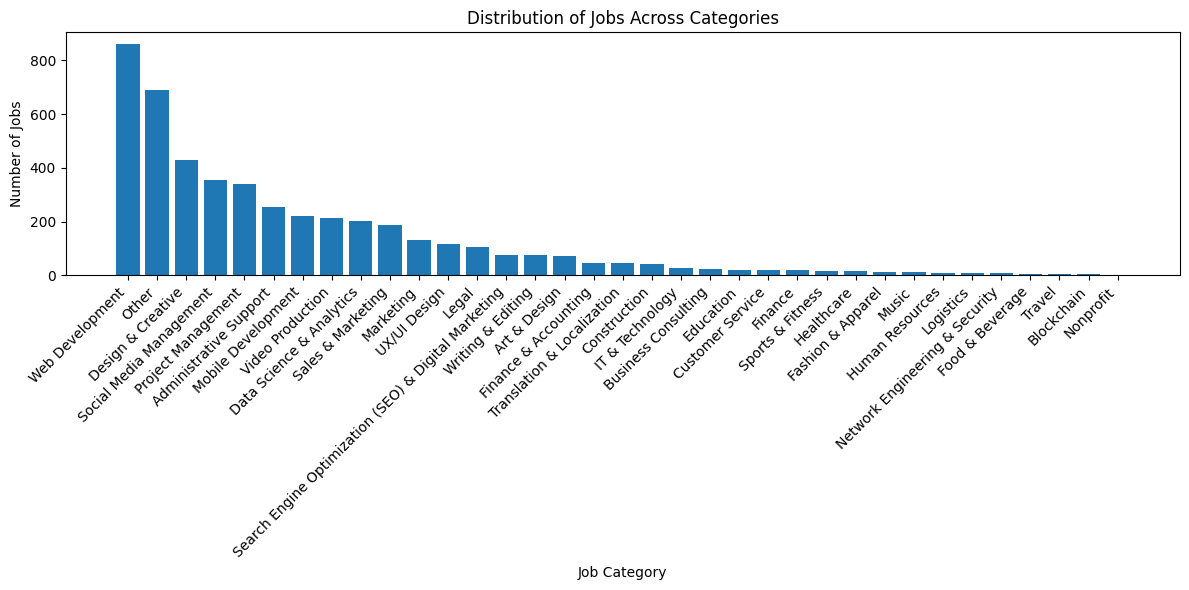

In [ ]:
# prompt: plot this '

import pandas as pd
import matplotlib.pyplot as plt

# Load the updated jobs data
jobs_df = pd.read_csv('updated_jobs.csv')

# Count the occurrences of each category
category_counts = jobs_df['category'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
plt.bar(category_counts.index, category_counts.values)
plt.xlabel("Job Category")
plt.ylabel("Number of Jobs")
plt.title("Distribution of Jobs Across Categories")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
jobs_df.columns

Index(['id', 'title', 'key', 'date', 'link', 'description', 'job_type',
       'experience_level', 'budget', 'category'],
      dtype='object')

In [ ]:
# prompt: print the title for other

# Assuming you want to print the titles of jobs categorized as 'Other'
other_jobs = jobs_df[jobs_df['category'] == 'Other']
print(other_jobs['title'])

5       Looking for Japanese people to read simple Eng...
7            Disputes Recovery for eCommerce store in USA
22                            Email deliverability expert
30                 Google Ads Expert for eCommerce Agency
35              Company Sourcing in Alto Paraná, Paraguay
                              ...                        
4642    [$250] Remove the redundant `+ New workspace` ...
4665    Employment Reference and Background Check Spec...
4671    Cold Caller Needed for Real Estate Investing G...
4674                                       Ai development
4675      Retype Handwritten document into Microsoft word
Name: title, Length: 690, dtype: object


In [ ]:
# prompt: print all other titles

# Assuming you want to print the titles of jobs categorized as 'Other'
other_jobs = jobs_df[jobs_df['category'] == 'Other']
print(other_jobs['title'])

5       Looking for Japanese people to read simple Eng...
7            Disputes Recovery for eCommerce store in USA
22                            Email deliverability expert
30                 Google Ads Expert for eCommerce Agency
35              Company Sourcing in Alto Paraná, Paraguay
                              ...                        
4642    [$250] Remove the redundant `+ New workspace` ...
4665    Employment Reference and Background Check Spec...
4671    Cold Caller Needed for Real Estate Investing G...
4674                                       Ai development
4675      Retype Handwritten document into Microsoft word
Name: title, Length: 690, dtype: object


In [ ]:
other_jobs.to_csv("other.csv",index=False)

In [ ]:
# prompt: visuvalize the the jobs_df  to give more interative to my client

import pandas as pd
import plotly.express as px

# Load the updated jobs data
jobs_df = pd.read_csv('/content/category upwork jobs.csv')

# Count the occurrences of each category
category_counts = jobs_df['category'].value_counts()

# Create an interactive bar plot using Plotly Express
fig = px.bar(category_counts,
             x=category_counts.index,
             y=category_counts.values,
             labels={'x': 'Job Category', 'y': 'Number of Jobs'},
             title='Distribution of Jobs Across Categories',
             text=category_counts.values) # Display counts on bars

# Customize the plot for better readability
fig.update_layout(xaxis_title="Job Category",
                  yaxis_title="Number of Jobs",
                  xaxis={'categoryorder':'total descending'},
                  title={'x':0.5, 'xanchor':'center'},
                  width=900, height=600)
fig.update_traces(textposition='outside') # Position text outside bars

fig.show()

In [ ]:
# prompt: create a desh board for /content/category upwork jobs.csv  file

import pandas as pd
import plotly.express as px

# Load the updated jobs data
jobs_df = pd.read_csv('/content/category upwork jobs.csv')

# Count the occurrences of each category
category_counts = jobs_df['category'].value_counts()

# Create an interactive bar plot using Plotly Express
fig = px.bar(category_counts,
             x=category_counts.index,
             y=category_counts.values,
             labels={'x': 'Job Category', 'y': 'Number of Jobs'},
             title='Distribution of Jobs Across Categories',
             text=category_counts.values) # Display counts on bars

# Customize the plot for better readability
fig.update_layout(xaxis_title="Job Category",
                  yaxis_title="Number of Jobs",
                  xaxis={'categoryorder':'total descending'},
                  title={'x':0.5, 'xanchor':'center'},
                  width=900, height=600)
fig.update_traces(textposition='outside') # Position text outside bars

fig.show()